In [69]:
import pandas as pd
import numpy as np
import  math
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Read the dataset
data_set = pd.read_csv("data_set.csv") 

# Obtaining the resolution information for dataset
En_Res= data_set['e_width']*data_set['e_height']

# Calculate average scene change by duration based on second
# AVG_Scene_Change= data_set['c_scene_change_ffmpeg_ratio90']*60/data_set['s_duration']
# 'scene_change_average' : AVG_Scene_Change (in case of testing width scene change ratio )


# selecting our desire parameters

desire = pd.DataFrame({'En_Res': En_Res,
                       'clip_id':data_set['s_video_id'],
                       'e_crf': data_set['e_crf'],
                       't_average_bitrate': data_set['t_average_bitrate'],
                       't_average_vmaf': data_set['t_average_vmaf'],
                       's_duration': data_set['s_duration'],
                       's_storage_size': data_set['s_storage_size'],
                       's_height': data_set['s_height'],
                       'e_framerate':data_set['e_framerate']})

desire.dropna(inplace=True)
desire.head()



,En_Res,clip_id,e_crf,t_average_bitrate,t_average_vmaf,s_duration,s_storage_size,s_height,e_framerate
0,2073600,8,18,31214,97.204616,65,521709628,1080,50.0
1,230400,8,18,2750,67.255472,65,521709628,1080,50.0
2,921600,8,18,10777,90.423618,65,521709628,1080,50.0
3,518400,8,18,5990,83.276829,65,521709628,1080,50.0
4,331776,8,18,3766,75.562682,65,521709628,1080,50.0


In [70]:
# remove outliers of average_bitrate by ITU-T method

shape=desire['t_average_bitrate'].shape[0]
I_range=desire['t_average_bitrate'].describe()[6]-desire['t_average_bitrate'].describe()[4]
I_range2=I_range*3
max_threshold=desire['t_average_bitrate'].describe()[6]+I_range2
for i in range(shape):
    if(desire.iloc[i, 7:8].values[0] >= max_threshold):
        desire.iloc[i, 7:8]=np.nan


desire.dropna(inplace=True)
desire.head()

,En_Res,clip_id,e_crf,t_average_bitrate,t_average_vmaf,s_duration,s_storage_size,s_height,e_framerate
0,2073600,8,18,31214,97.204616,65,521709628,1080,50.0
1,230400,8,18,2750,67.255472,65,521709628,1080,50.0
2,921600,8,18,10777,90.423618,65,521709628,1080,50.0
3,518400,8,18,5990,83.276829,65,521709628,1080,50.0
4,331776,8,18,3766,75.562682,65,521709628,1080,50.0


In [71]:
# remove outliers of scene_change_average by ITU-T method

Form=desire['scene_change_average'].Form[0]
I_range=desire['scene_change_average'].describe()[6]-desire['scene_change_average'].describe()[4]
I_range2=I_range*3
max_threshold=desire['scene_change_average'].describe()[6]+I_range2
for i in range(Form):
    if(desire.iloc[i, 0:1].values[0] >= max_threshold):
        desire.iloc[i, 0:1]=np.nan
        
desire.dropna(inplace=True)

KeyError: 'scene_change_average'

In [72]:
# remove outliers of s_duration by ITU-T method


shape=desire['s_duration'].shape[0]
I_range=desire['s_duration'].describe()[6]-desire['s_duration'].describe()[4]
I_range2=I_range*1.5
max_threshold=desire['s_duration'].describe()[6]+I_range2
for i in range(shape):
    if(desire.iloc[i, 1:2].values[0] >= max_threshold):
        desire.iloc[i, 1:2]=np.nan

desire.dropna(inplace=True)
desire.head()

,En_Res,clip_id,e_crf,t_average_bitrate,t_average_vmaf,s_duration,s_storage_size,s_height,e_framerate
0,2073600,8,18,31214,97.204616,65,521709628,1080,50.0
1,230400,8,18,2750,67.255472,65,521709628,1080,50.0
2,921600,8,18,10777,90.423618,65,521709628,1080,50.0
3,518400,8,18,5990,83.276829,65,521709628,1080,50.0
4,331776,8,18,3766,75.562682,65,521709628,1080,50.0


In [73]:
# pre-processing desire data

desire = desire.drop(['clip_id'], axis=1);

X = np.array(desire.drop(['t_average_vmaf'], 1))
X = preprocessing.scale(X)
y = np.array(desire['t_average_vmaf'])

# split desire data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

/Users/amin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:180: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


/Users/amin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


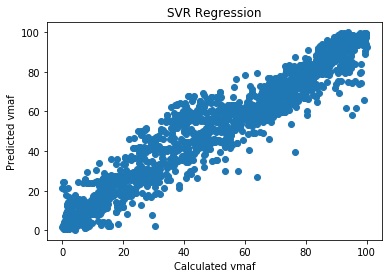

In [74]:
# Make SVR model

SVR = svm.SVR()
SVR.fit(X_train, y_train)
SVR_Reg=SVR.predict(X_test)
plt.scatter(y_test,SVR_Reg)
plt.xlabel('Calculated vmaf')
plt.ylabel('Predicted vmaf')
plt.title('SVR Regression')
desire_svr = pd.concat([pd.DataFrame(y_test) ,pd.DataFrame(SVR_Reg)], axis = 1);
desire_svr.to_excel('SVR.xlsx');

In [75]:
# Calculate SVR correlation , MSE and RMSE

print('Corr_SVR',np.corrcoef(y_test , SVR_Reg)[0][1])
MSE_SVR = MSE(y_test, SVR_Reg)
print('MSE_SVR: %f' % MSE_SVR)
RMSE_SVR = sqrt(MSE_SVR)
print('RMSE_SVR: %f' % RMSE_SVR)


Corr_SVR 0.9673724708529527
MSE_SVR: 64.322975
RMSE_SVR: 8.020161


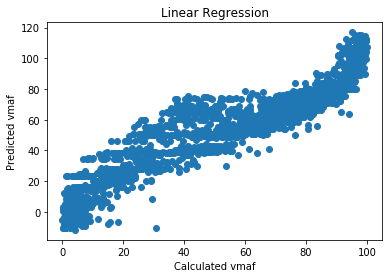

In [76]:
# make Linear Regression model

Linear_Reg = LinearRegression()
Linear_Reg.fit(X_train, y_train)

predict_Linear_Reg=Linear_Reg.predict(X_test)

plt.scatter(y_test,predict_Linear_Reg)
plt.xlabel('Calculated vmaf')
plt.ylabel('Predicted vmaf')
plt.title('Linear Regression')

desire_lin = pd.concat([pd.DataFrame(y_test) ,pd.DataFrame(predict_Linear_Reg)], axis = 1);
desire_lin.to_excel('LinearRegression.xlsx');


In [77]:
# Calculate Linear Regression correlation , MSE and RMSE

print('Corr_Li',np.corrcoef(y_test , predict_Linear_Reg)[0][1])
MSE_Li=MSE(y_test, predict_Linear_Reg)
print('MSE_LiReg: %f' % MSE_Li)
RMSE_Li = sqrt(MSE_Li)
print('RMSE_LiReg: %f' % RMSE_Li)


Corr_Li 0.9301710201859431
MSE_LiReg: 132.615021
RMSE_LiReg: 11.515860


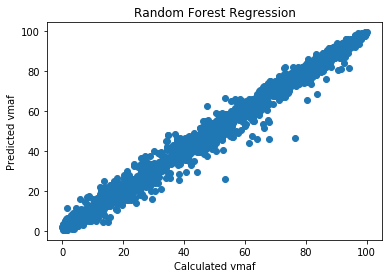

In [78]:
# Make RF model


# model with 2000 decision trees
randomforest = RandomForestRegressor(n_estimators = 2000, random_state = 42)

# Train model on train data
randomforest.fit(X_train, y_train)

prediction_rf=randomforest.predict(X_test)
plt.scatter(y_test,prediction_rf)
plt.xlabel('Calculated vmaf')
plt.ylabel('Predicted vmaf')
plt.title('Random Forest Regression')
data_frame_rf = pd.concat([pd.DataFrame(y_test) ,pd.DataFrame(prediction_rf)], axis = 1);
data_frame_rf.to_excel('RF.xlsx');

In [79]:
print('Corr_rf',np.corrcoef(y_test , prediction_rf)[0][1])
MSE_RF = MSE(y_test, prediction_rf)
print('MSE: %f' % MSE_RF)
rsme_RF = sqrt(MSE_RF)
print('RMSE: %f' % rmse_RF)

Corr_rf 0.9936643948379624
MSE: 12.406028
RMSE: 3.568147
